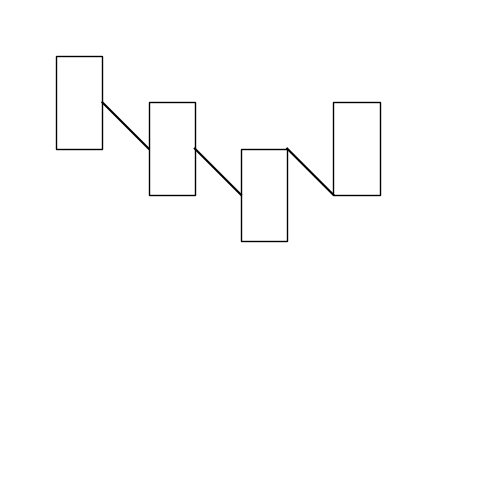

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw layers and connections
ax.add_patch(patches.Rectangle((0.1, 0.7), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Input layer
ax.add_patch(patches.Rectangle((0.3, 0.6), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike Generator
ax.add_patch(patches.Rectangle((0.5, 0.5), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike Neuron
ax.add_patch(patches.Rectangle((0.7, 0.6), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Output layer

# Draw connections between layers
plt.plot([0.2, 0.3], [0.8, 0.7], color='black')  # Connection from Input to Spike Generator
plt.plot([0.4, 0.5], [0.7, 0.6], color='black')  # Connection from Spike Generator to Spike Neuron
plt.plot([0.6, 0.7], [0.7, 0.6], color='black')  # Connection from Spike Neuron to Output

# Set axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

# Show the plot
plt.show()

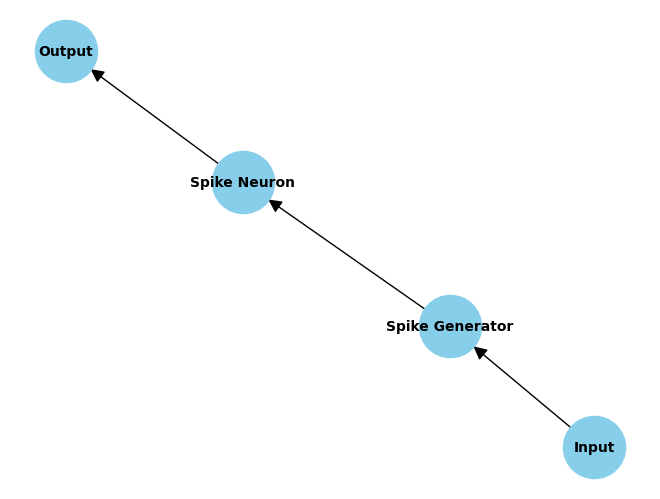

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to represent the SNN architecture
G.add_nodes_from(["Input", "Spike Generator", "Spike Neuron", "Output"])
G.add_edges_from([("Input", "Spike Generator"), ("Spike Generator", "Spike Neuron"), ("Spike Neuron", "Output")])

# Draw the graph
pos = nx.spring_layout(G)  # You can choose different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20)
plt.show()


In [5]:
pip install pytorch_spiking

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import pytorch_spiking
import torchvision
torch.manual_seed(0)
np.random.seed(0)

In [8]:
class SelfAttention(torch.nn.Module):
    def __init__(self, input_dim):
        super(SelfAttention, self).__init__()
        self.query = torch.nn.Linear(input_dim, input_dim)
        self.key = torch.nn.Linear(input_dim, input_dim)
        self.value = torch.nn.Linear(input_dim, input_dim)

    def forward(self, x):
        q = self.query(x)
        k = self.key(x)
        v = self.value(x)
        attn_weights = torch.nn.functional.softmax(q @ k.transpose(-2, -1), dim=-1)
        return attn_weights @ v

In [12]:

model = torch.nn.Sequential(
     torch.nn.Linear(784, 256),   #13 layers
     SelfAttention(256),
     torch.nn.SELU(),
    # set spiking_aware_training and a moderate dt
    pytorch_spiking.SpikingActivation(
        torch.nn.ELU(alpha=1.0), dt=0.5, spiking_aware_training=True #exponential linear unit
    ),
    torch.nn.Linear(256,128),
    SelfAttention(128),
    torch.nn.GELU(),
     torch.nn.Dropout(0.4),
       pytorch_spiking.SpikingActivation(
        torch.nn.ELU(alpha=1.0), dt=0.8, spiking_aware_training=True #exponential linear unit
    ),
    torch.nn.Linear(128,64),
    torch.nn.Dropout(0.4),
    pytorch_spiking.TemporalAvgPool(),
    torch.nn.Linear(64, 10),
)



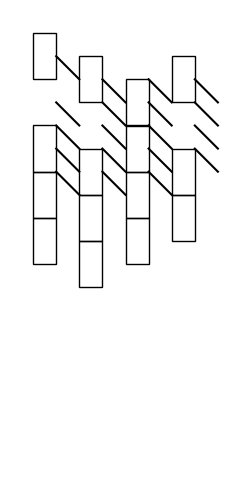

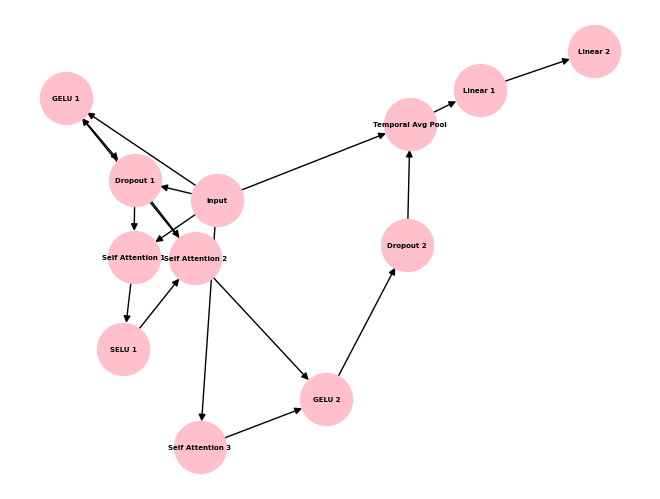

In [33]:
# prompt: visualize the above model's architecture without using torchviz and dot


# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Draw layers and connections
ax.add_patch(patches.Rectangle((0.1, 0.7), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Input layer
ax.add_patch(patches.Rectangle((0.3, 0.6), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike Generator
ax.add_patch(patches.Rectangle((0.5, 0.5), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Spike Neuron
ax.add_patch(patches.Rectangle((0.7, 0.6), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Output layer
ax.add_patch(patches.Rectangle((0.1, 0.3), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Self Attention 1
ax.add_patch(patches.Rectangle((0.3, 0.2), 0.1, 0.2, edgecolor='black', facecolor='none'))  # SELU 1
ax.add_patch(patches.Rectangle((0.5, 0.3), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Self Attention 2
ax.add_patch(patches.Rectangle((0.7, 0.2), 0.1, 0.2, edgecolor='black', facecolor='none'))  # GELU 1
ax.add_patch(patches.Rectangle((0.1, 0.1), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Dropout 1
ax.add_patch(patches.Rectangle((0.3, 0.0), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Self Attention 3
ax.add_patch(patches.Rectangle((0.5, 0.1), 0.1, 0.2, edgecolor='black', facecolor='none'))  # GELU 2
ax.add_patch(patches.Rectangle((0.7, 0.0), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Dropout 2
ax.add_patch(patches.Rectangle((0.1, -0.1), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Temporal Avg Pool
ax.add_patch(patches.Rectangle((0.3, -0.2), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Linear 1
ax.add_patch(patches.Rectangle((0.5, -0.1), 0.1, 0.2, edgecolor='black', facecolor='none'))  # Linear 2

# Draw connections between layers
plt.plot([0.2, 0.3], [0.8, 0.7], color='black')  # Connection from Input to Self Attention 1
plt.plot([0.4, 0.5], [0.7, 0.6], color='black')  # Connection from Self Attention 1 to SELU 1
plt.plot([0.6, 0.7], [0.7, 0.6], color='black')  # Connection from SELU 1 to Self Attention 2
plt.plot([0.8, 0.9], [0.7, 0.6], color='black')  # Connection from Self Attention 2 to GELU 1
plt.plot([0.2, 0.3], [0.6, 0.5], color='black')  # Connection from Input to Self Attention 3
plt.plot([0.4, 0.5], [0.6, 0.5], color='black')  # Connection from Self Attention 3 to GELU 2
plt.plot([0.6, 0.7], [0.6, 0.5], color='black')  # Connection from GELU 2 to Dropout 2
plt.plot([0.8, 0.9], [0.6, 0.5], color='black')  # Connection from Dropout 2 to Temporal Avg Pool
plt.plot([0.2, 0.3], [0.5, 0.4], color='black')  # Connection from Input to Dropout 1
plt.plot([0.4, 0.5], [0.5, 0.4], color='black')  # Connection from Dropout 1 to Self Attention 1
plt.plot([0.6, 0.7], [0.5, 0.4], color='black')  # Connection from Self Attention 1 to SELU 1
plt.plot([0.8, 0.9], [0.5, 0.4], color='black')  # Connection from SELU 1 to Self Attention 2
plt.plot([0.2, 0.3], [0.4, 0.3], color='black')  # Connection from Input to GELU 1
plt.plot([0.4, 0.5], [0.4, 0.3], color='black')  # Connection from GELU 1 to Dropout 1
plt.plot([0.6, 0.7], [0.4, 0.3], color='black')  # Connection from Dropout 1 to Self Attention 2
plt.plot([0.8, 0.9], [0.4, 0.3], color='black')  # Connection from Self Attention 2 to GELU 2
plt.plot([0.2, 0.3], [0.3, 0.2], color='black')  # Connection from Input to Temporal Avg Pool
plt.plot([0.4, 0.5], [0.3, 0.2], color='black')  # Connection from Temporal Avg Pool to Linear 1
plt.plot([0.6, 0.7], [0.3, 0.2], color='black')  # Connection from Linear 1 to Linear 2

# Set axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal', adjustable='box')
plt.axis('off')

# Show the plot
plt.show()

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to represent the SNN architecture
G.add_nodes_from(["Input", "Self Attention 1", "SELU 1", "Self Attention 2", "GELU 1", "Dropout 1", "Self Attention 3", "GELU 2", "Dropout 2", "Temporal Avg Pool", "Linear 1", "Linear 2"])
G.add_edges_from([("Input", "Self Attention 1"), ("Self Attention 1", "SELU 1"), ("SELU 1", "Self Attention 2"), ("Self Attention 2", "GELU 1"), ("Input", "Self Attention 3"), ("Self Attention 3", "GELU 2"), ("GELU 2", "Dropout 2"), ("Dropout 2", "Temporal Avg Pool"), ("Input", "Dropout 1"), ("Dropout 1", "Self Attention 1"), ("Self Attention 1", "SELU 1"), ("SELU 1", "Self Attention 2"), ("Input", "GELU 1"), ("GELU 1", "Dropout 1"), ("Dropout 1", "Self Attention 2"), ("Self Attention 2", "GELU 2"), ("Input", "Temporal Avg Pool"), ("Temporal Avg Pool", "Linear 1"), ("Linear 1", "Linear 2")])

# Draw the graph
pos = nx.spring_layout(G)  # You can choose different layout algorithms
nx.draw(G, pos, with_labels=True, node_size=1400, node_color="pink", font_size=5, font_color="black", font_weight="bold", arrowsize=10)
plt.show()


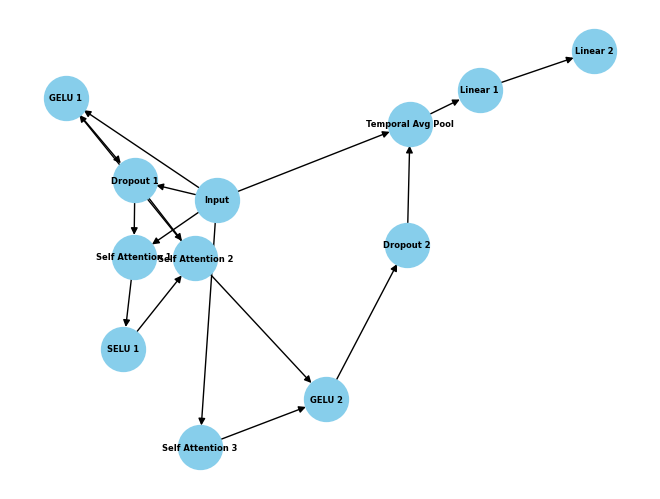

In [40]:
# prompt: make the node figure larger

nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=6, font_color="black", font_weight="bold", arrowsize=10)
plt.show()
